[![Notebook Tutorial](__code/__all/notebook_tutorial.png)](https://neutronimaging.ornl.gov/ct-reconstruction/)

<img src='__docs/notebook_rules.png' />

In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
# %matplotlib notebook
# %matplotlib ipympl
# %matplotlib inline

import imars3d
print(f"Using imars3d version {imars3d.__version__}")

from __code.imars3dui import Imars3dui
from __code.roi_selection_ui import Interface

from __code import system
system.System.select_working_dir()
from __code.__all import custom_style
custom_style.style()

Using imars3d version 1.1.4


** Using Debugging Mode! **


# Select input data 

In [2]:
from __code.imars3dui import DataType
import os

# TESTING

working_from_home = True

if working_from_home:
    top_folder = "/Volumes/JeanHardDrive/HFIR/CG1D/IPTS-24863-test-imars3d-notebook/raw/"
    raw_data = top_folder + "ct_scans/Feb04_2020_half_set"
else:
    top_folder = "/Users/j35/HFIR/CG1D/IPTS-24863-test-imars3d-notebook/raw/"
    raw_data = top_folder + "ct_scans/Feb04_2020"

assert os.path.exists(raw_data)
ob_data = top_folder + "/ob/Feb04_2020"
assert os.path.exists(ob_data)
dc_data = top_folder + "/dc/Feb06_2020"
assert os.path.exists(dc_data)

## raw data

In [3]:
o_imars3dui = Imars3dui(working_dir=system.System.get_working_dir())
# o_imars3dui.select_raw()

# debugging
o_imars3dui.current_data_type = DataType.raw
o_imars3dui.data_selected(raw_data)

raw folder selected: ['/Volumes/JeanHardDrive/HFIR/CG1D/IPTS-24863-test-imars3d-notebook/raw/ct_scans/Feb04_2020_half_set'] with 582 files)


## ob 

In [4]:
# o_imars3dui.select_ob()
o_imars3dui.current_data_type = DataType.ob
o_imars3dui.data_selected([ob_data])

ob folder selected: ['/Volumes/JeanHardDrive/HFIR/CG1D/IPTS-24863-test-imars3d-notebook/raw/ob/Feb04_2020'] with 10 files)


## dc 

In [5]:
# o_imars3dui.select_dc()
o_imars3dui.current_data_type = DataType.dc
o_imars3dui.data_selected([dc_data])

dc folder selected: ['/Volumes/JeanHardDrive/HFIR/CG1D/IPTS-24863-test-imars3d-notebook/raw/dc/Feb06_2020'] with 10 files)


# Load

ct:   0%|          | 0/582 [00:00<?, ?it/s]

ob:   0%|          | 0/10 [00:00<?, ?it/s]

dc:   0%|          | 0/10 [00:00<?, ?it/s]

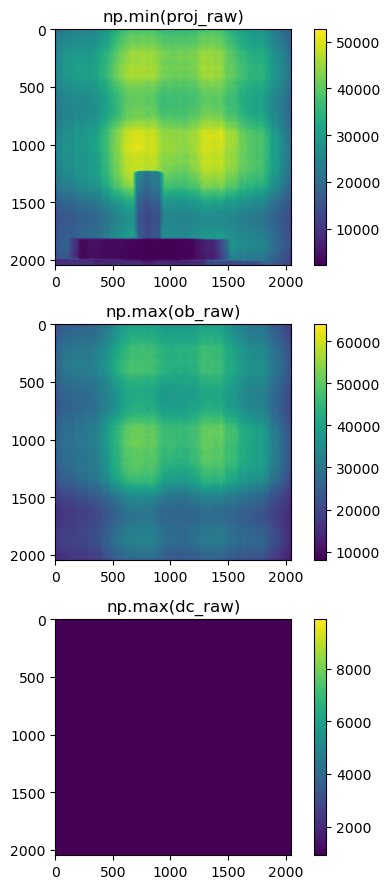

In [6]:
o_imars3dui.load_and_display_data()

# Crop

### select crop region

In [7]:
o_imars3dui.crop_embedded()

interactive(children=(IntSlider(value=50, description='left', max=2047), IntSlider(value=1550, continuous_upda…

### perform cropping 

In [8]:
o_imars3dui.perform_embedded_cropping()

Running crop ...
cropping done!


# Gamma filtering  (<font size=5 type="bold">Z</font><font size=4 type="bold">Z</font><font size=3 type="bold">Z</font>)

In [9]:
o_imars3dui.gamma_filtering_options()

Checkbox(value=False, description='Gamma filtering')

In [10]:
o_imars3dui.gamma_filtering()

Gamma filtering skipped!


# Normalization (<font size=5 type="bold">Z</font><font size=4 type="bold">Z</font><font size=3 type="bold">Z</font>)

Running normalization ...
normalization done in 2.09s


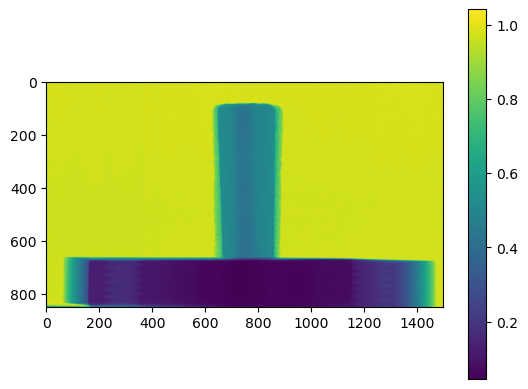

In [11]:
o_imars3dui.normalization_and_display()

# Beam fluctuation correction

### Select a region that does not contain the sample to improve the normalization

In [12]:
o_imars3dui.beam_fluctuation_correction_option()

Checkbox(value=False, description='Beam fluctuation correction')

### select beam fluctuation region

In [13]:
o_imars3dui.apply_select_beam_fluctuation()

### perform beam fluctuation correction

In [14]:
o_imars3dui.beam_fluctuation_correction_embedded()

# Transmission to attenuation

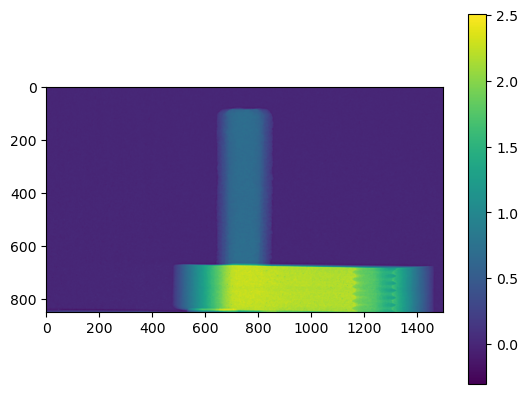

In [15]:
o_imars3dui.minus_log_and_display()

# Tilt correction (<font size=5 type="bold">Z</font><font size=4 type="bold">Z</font><font size=3 type="bold">Z</font>)

## find 0 and 180 degrees files

In [16]:
o_imars3dui.find_0_180_degrees_files()

## calculate tilt 

In [17]:
o_imars3dui.calculate_tilt()

### Slices to use to test tilt calculation 

In [18]:
o_imars3dui.test_tilt_slices_selection()

interactive(children=(IntSlider(value=103, description='slice1', max=849), IntSlider(value=602, description='s…

### testing tilt on selected algorithms (Zzz)

In [19]:
o_imars3dui.testing_tilt_on_selected_algorithms()

IntProgress(value=0, description='Progress:', max=5)

INFO:imars3d.backend.diagnostics.tilt:Executing Filter: Tilt correction
INFO:imars3d.backend.diagnostics.tilt:3D array detected, applying tilt correction with tilt = -0.520 deg


Running direct minimization ... 

Applying tilt corr:   0%|          | 0/582 [00:00<?, ?it/s]

INFO:imars3d.backend.diagnostics.rotation:Executing Filter: Find Rotation Center
INFO:imars3d.backend.util.functions:Due to system load, setting maximum workers to 7
INFO:imars3d.backend.diagnostics.rotation:Using all pairs of angles


Done!


Finding rotation center:   0%|          | 0/3 [00:00<?, ?it/s]

INFO:imars3d.backend.diagnostics.rotation:FINISHED Executing Filter: Find Rotation Center


interactive(children=(ToggleButtons(description='Algorithm:', disabled=True, options=('direct minimization',),…

## display data with tilt corrected

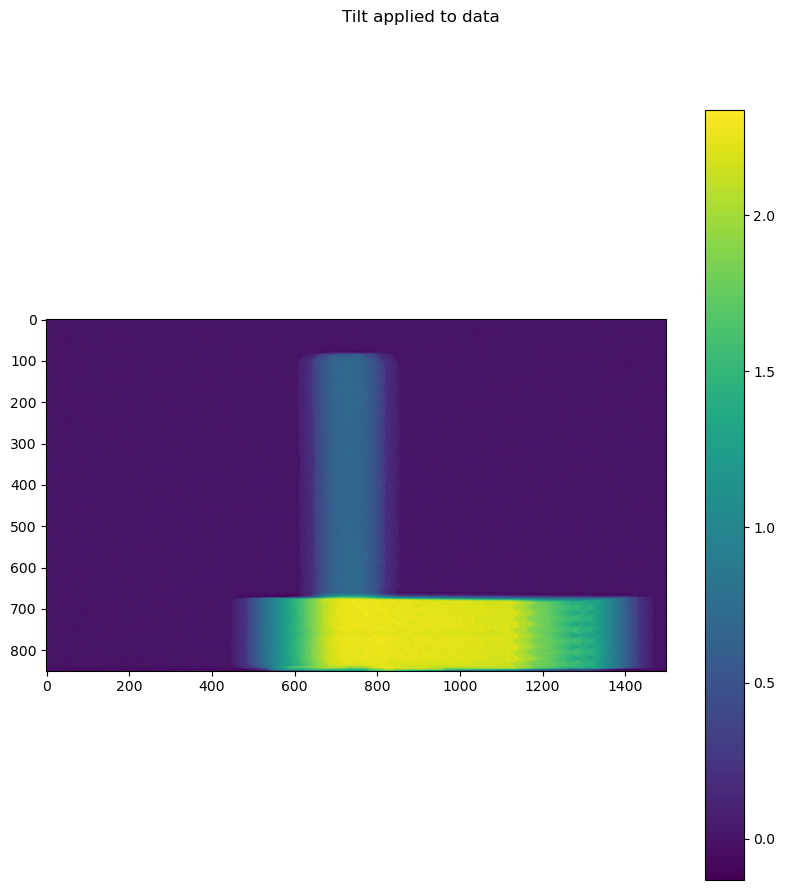

In [20]:
o_imars3dui.display_with_tilt()

# Filtering

* remove negative values

In [21]:
o_imars3dui.filter_options()

Checkbox(value=False, description='Remove negative values')

In [22]:
o_imars3dui.apply_filter_options()

 Skipped remove negative values!


# Display sinogram 

In [23]:
o_imars3dui.create_and_display_sinogram()

interactive(children=(IntSlider(value=0, description='index', max=850), Output()), _dom_classes=('widget-inter…

# Ring removal

### select

In [24]:
o_imars3dui.ring_removal_options()

### apply 

In [25]:
o_imars3dui.apply_ring_removal_options()

No strikes removal using BM3D
No strikes removal using Vo
No strikes removal using Ketcham


### check 

In [26]:
o_imars3dui.test_ring_removal()

interactive(children=(IntSlider(value=0, description='index', max=850), Output()), _dom_classes=('widget-inter…

# Testing reconstruction on some slides

### Select slices to reconstruct 

In [27]:
o_imars3dui.define_slices_to_test_reconstruction()

interactive(children=(IntsInput(value=[170, 340, 510, 680], description='list_slices', max=849, min=0), Output…

### Select and define algorithms to use 

In [28]:
o_imars3dui.testing_reconstruction_algorithm()

HTML(value="<font color='blue'>Define reconstruction algorithms to use and their settings:")

Accordion(children=(VBox(children=(Checkbox(value=True, description='Use this method?'), FloatText(value=1.0, …

###  Test reconstruction on those slides 

In [29]:
o_imars3dui.running_reconstruction_test()

INFO:imars3d.backend.reconstruction:Executing Filter: Reconstruction


running reconstruction test
	> testing reconstruction using astra:
	 using iMars3d (CPU mode)


ValueError: Array parameter 'theta' value must be an instance of ndarray, not [0.0, 0.0054105206811824215, 0.010821041362364843, 0.016231562043547264, 0.021642082724729686, 0.027052603405912107, 0.03246312408709453, 0.03787364476827695, 0.04328416544945937, 0.0486946861306418, 0.054105206811824215, 0.05951572749300664, 0.06492624817418906, 0.07033676885537149, 0.0757472895365539, 0.08115781021773633, 0.08656833089891874, 0.09197885158010116, 0.0973893722612836, 0.102799892942466, 0.10821041362364843, 0.11362093430483085, 0.11903145498601328, 0.1244419756671957, 0.12985249634837812, 0.13526301702956053, 0.14067353771074298, 0.14608405839192537, 0.1514945790731078, 0.15690509975429023, 0.16231562043547265, 0.16772614111665507, 0.1731366617978375, 0.17854718247901993, 0.18395770316020232, 0.18936822384138474, 0.1947787445225672, 0.2001892652037496, 0.205599785884932, 0.21101030656611444, 0.21642082724729686, 0.2218313479284793, 0.2272418686096617, 0.23265238929084414, 0.23806290997202656, 0.24347343065320895, 0.2488839513343914, 0.2542944720155738, 0.25970499269675623, 0.26511551337793865, 0.27052603405912107, 0.2759365547403035, 0.28134707542148596, 0.2867575961026683, 0.29216811678385074, 0.2975786374650332, 0.3029891581462156, 0.30839967882739805, 0.31381019950858047, 0.3192207201897629, 0.3246312408709453, 0.3300417615521277, 0.33545228223331014, 0.34086280291449256, 0.346273323595675, 0.3516838442768574, 0.35709436495803987, 0.36250488563922223, 0.36791540632040465, 0.3733259270015871, 0.3787364476827695, 0.38414696836395196, 0.3895574890451344, 0.39496800972631674, 0.4003785304074992, 0.40578905108868163, 0.411199571769864, 0.41661009245104647, 0.4220206131322289, 0.4274311338134113, 0.4328416544945937, 0.43825217517577614, 0.4436626958569586, 0.449073216538141, 0.4544837372193234, 0.45989425790050587, 0.4653047785816883, 0.47071529926287065, 0.4761258199440531, 0.48153634062523554, 0.4869468613064179, 0.4923573819876004, 0.4977679026687828, 0.5031784233499652, 0.5085889440311476, 0.51399946471233, 0.5194099853935125, 0.5248205060746949, 0.5302310267558773, 0.5356415474370597, 0.5410520681182421, 0.5464625887994246, 0.551873109480607, 0.5572836301617894, 0.5626941508429719, 0.5681046715241542, 0.5735151922053366, 0.5789257128865192, 0.5843362335677015, 0.5897467542488839, 0.5951572749300664, 0.6005677956112487, 0.6059783162924312, 0.6113888369736137, 0.6167993576547961, 0.6222098783359784, 0.6276203990171609, 0.6330309196983434, 0.6384414403795258, 0.6438519610607082, 0.6492624817418906, 0.654673002423073, 0.6600835231042554, 0.6654940437854379, 0.6709045644666203, 0.6763150851478027, 0.6817256058289851, 0.6871361265101675, 0.69254664719135, 0.6979571678725324, 0.7033676885537148, 0.7087782092348972, 0.7141887299160797, 0.719599250597262, 0.7250097712784445, 0.730420291959627, 0.7358308126408093, 0.7412413333219917, 0.7466518540031742, 0.7520623746843567, 0.757472895365539, 0.7628834160467215, 0.7682939367279039, 0.7737044574090862, 0.7791149780902688, 0.7845254987714512, 0.7899360194526335, 0.795346540133816, 0.8007570608149984, 0.8061675814961807, 0.8115781021773633, 0.8169886228585457, 0.822399143539728, 0.8278096642209105, 0.8332201849020929, 0.8386307055832753, 0.8440412262644578, 0.8494517469456402, 0.8548622676268226, 0.860272788308005, 0.8656833089891874, 0.8710938296703699, 0.8765043503515523, 0.8819148710327347, 0.8873253917139172, 0.8927359123950995, 0.898146433076282, 0.9035569537574645, 0.9089674744386468, 0.9143779951198293, 0.9197885158010117, 0.925199036482194, 0.9306095571633766, 0.936020077844559, 0.9414305985257413, 0.9468411192069238, 0.9522516398881062, 0.9576621605692885, 0.9630726812504711, 0.9684832019316535, 0.9738937226128358, 0.9793042432940183, 0.9847147639752007, 0.990125284656383, 0.9955358053375656, 1.0009463260187481, 1.0063568466999304, 1.0117673673811127, 1.0171778880622953, 1.0225884087434778, 1.02799892942466, 1.0334094501058426, 1.038819970787025, 1.0442304914682072, 1.0496410121493898, 1.0550515328305723, 1.0604620535117546, 1.0658725741929371, 1.0712830948741194, 1.076693615555302, 1.0821041362364843, 1.0875146569176668, 1.092925177598849, 1.0983356982800316, 1.103746218961214, 1.1091567396423965, 1.1145672603235788, 1.1199777810047613, 1.1253883016859438, 1.1307988223671261, 1.1362093430483085, 1.141619863729491, 1.1470303844106733, 1.1524409050918558, 1.1578514257730383, 1.1632619464542207, 1.168672467135403, 1.1740829878165855, 1.1794935084977678, 1.1849040291789503, 1.1903145498601329, 1.1957250705413152, 1.2011355912224975, 1.20654611190368, 1.2119566325848623, 1.2173671532660448, 1.2227776739472274, 1.22818819462841, 1.2335987153095922, 1.2390092359907745, 1.2444197566719568, 1.2498302773531393, 1.2552407980343219, 1.2606513187155044, 1.2660618393966867, 1.271472360077869, 1.2768828807590515, 1.2822934014402338, 1.2877039221214164, 1.293114442802599, 1.2985249634837812, 1.3039354841649635, 1.309346004846146, 1.3147565255273284, 1.3201670462085109, 1.3255775668896934, 1.3309880875708757, 1.336398608252058, 1.3418091289332406, 1.3472196496144229, 1.3526301702956054, 1.358040690976788, 1.3634512116579702, 1.3688617323391528, 1.374272253020335, 1.3796827737015174, 1.3850932943827, 1.3905038150638824, 1.3959143357450647, 1.4013248564262473, 1.4067353771074296, 1.4121458977886119, 1.4175564184697944, 1.422966939150977, 1.4283774598321595, 1.4337879805133418, 1.439198501194524, 1.4446090218757064, 1.450019542556889, 1.4554300632380714, 1.460840583919254, 1.4662511046004363, 1.4716616252816186, 1.4770721459628011, 1.4824826666439834, 1.487893187325166, 1.4933037080063485, 1.4987142286875308, 1.5041247493687133, 1.5095352700498956, 1.514945790731078, 1.5203563114122605, 1.525766832093443, 1.5311773527746253, 1.5365878734558078, 1.5419983941369901, 1.5474089148181724, 1.552819435499355, 1.5582299561805375, 1.5636404768617198, 1.5690509975429023, 1.5744615182240846, 1.579872038905267, 1.5852825595864495, 1.590693080267632, 1.5961036009488143, 1.6015141216299968, 1.6069246423111792, 1.6123351629923615, 1.617745683673544, 1.6231562043547265, 1.628566725035909, 1.6339772457170914, 1.6393877663982739, 1.644798287079456, 1.6502088077606385, 1.655619328441821, 1.6610298491230036, 1.6664403698041859, 1.6718508904853684, 1.6772614111665507, 1.682671931847733, 1.6880824525289155, 1.693492973210098, 1.6989034938912804, 1.704314014572463, 1.7097245352536452, 1.7151350559348275, 1.72054557661601, 1.7259560972971926, 1.7313666179783749, 1.7367771386595574, 1.7421876593407397, 1.747598180021922, 1.7530087007031045, 1.758419221384287, 1.7638297420654694, 1.769240262746652, 1.7746507834278344, 1.7800613041090165, 1.785471824790199, 1.7908823454713816, 1.796292866152564, 1.8017033868337464, 1.807113907514929, 1.812524428196111, 1.8179349488772936, 1.823345469558476, 1.8287559902396586, 1.834166510920841, 1.8395770316020235, 1.8449875522832055, 1.850398072964388, 1.8558085936455706, 1.8612191143267531, 1.8666296350079354, 1.872040155689118, 1.8774506763703003, 1.8828611970514826, 1.8882717177326651, 1.8936822384138476, 1.89909275909503, 1.9045032797762125, 1.909913800457395, 1.915324321138577, 1.9207348418197596, 1.9261453625009421, 1.9315558831821245, 1.936966403863307, 1.9423769245444895, 1.9477874452256716, 1.9531979659068541, 1.9586084865880367, 1.964019007269219, 1.9694295279504015, 1.974840048631584, 1.980250569312766, 1.9856610899939486, 1.9910716106751312, 1.9964821313563135, 2.0018926520374962, 2.0073031727186783, 2.012713693399861, 2.0181242140810434, 2.0235347347622255, 2.028945255443408, 2.0343557761245905, 2.039766296805773, 2.0451768174869556, 2.0505873381681377, 2.05599785884932, 2.0614083795305027, 2.0668189002116852, 2.0722294208928673, 2.07763994157405, 2.0830504622552324, 2.0884609829364145, 2.093871503617597, 2.0992820242987795, 2.104692544979962, 2.1101030656611446, 2.1155135863423267, 2.120924107023509, 2.1263346277046917, 2.1317451483858743, 2.137155669067057, 2.142566189748239, 2.1479767104294214, 2.153387231110604, 2.158797751791786, 2.1642082724729685, 2.169618793154151, 2.1750293138353336, 2.180439834516516, 2.185850355197698, 2.1912608758788807, 2.1966713965600633, 2.202081917241246, 2.207492437922428, 2.2129029586036104, 2.218313479284793, 2.223723999965975, 2.2291345206471576, 2.23454504132834, 2.2399555620095226, 2.245366082690705, 2.2507766033718877, 2.25618712405307, 2.2615976447342523, 2.2670081654154344, 2.272418686096617, 2.2778292067777994, 2.283239727458982, 2.288650248140164, 2.2940607688213466, 2.299471289502529, 2.3048818101837116, 2.310292330864894, 2.3157028515460767, 2.321113372227259, 2.3265238929084413, 2.331934413589624, 2.337344934270806, 2.3427554549519884, 2.348165975633171, 2.3535764963143535, 2.3589870169955356, 2.364397537676718, 2.3698080583579006, 2.375218579039083, 2.3806290997202657, 2.3860396204014482, 2.3914501410826303, 2.396860661763813, 2.402271182444995, 2.4076817031261775, 2.41309222380736, 2.4185027444885425, 2.4239132651697246, 2.429323785850907, 2.4347343065320897, 2.440144827213272, 2.4455553478944547, 2.4509658685756373, 2.45637638925682, 2.461786909938002, 2.4671974306191844, 2.4726079513003665, 2.478018471981549, 2.4834289926627315, 2.4888395133439136, 2.494250034025096, 2.4996605547062787, 2.505071075387461, 2.5104815960686437, 2.5158921167498263, 2.521302637431009, 2.526713158112191, 2.5321236787933734, 2.5375341994745555, 2.542944720155738, 2.5483552408369206, 2.553765761518103, 2.559176282199285, 2.5645868028804677, 2.5699973235616502, 2.5754078442428328, 2.5808183649240153, 2.586228885605198, 2.59163940628638, 2.5970499269675624, 2.602460447648745, 2.607870968329927, 2.6132814890111096, 2.618692009692292, 2.624102530373474, 2.6295130510546567, 2.6349235717358392, 2.6403340924170218, 2.6457446130982043, 2.651155133779387, 2.6565656544605694, 2.6619761751417514, 2.667386695822934, 2.672797216504116, 2.6782077371852986, 2.683618257866481, 2.689028778547663, 2.6944392992288457, 2.6998498199100283, 2.705260340591211, 2.7106708612723933, 2.716081381953576, 2.7214919026347584, 2.7269024233159405, 2.732312943997123, 2.7377234646783055, 2.7431339853594876, 2.74854450604067, 2.7539550267218527, 2.7593655474030347, 2.7647760680842173, 2.7701865887654, 2.7755971094465823, 2.781007630127765, 2.7864181508089474, 2.7918286714901295, 2.797239192171312, 2.8026497128524945, 2.8080602335336766, 2.813470754214859, 2.8188812748960417, 2.8242917955772238, 2.8297023162584063, 2.835112836939589, 2.8405233576207713, 2.845933878301954, 2.8513443989831364, 2.856754919664319, 2.862165440345501, 2.8675759610266836, 2.872986481707866, 2.878397002389048, 2.8838075230702307, 2.889218043751413, 2.8946285644325953, 2.900039085113778, 2.9054496057949604, 2.910860126476143, 2.9162706471573254, 2.921681167838508, 2.92709168851969, 2.9325022092008726, 2.937912729882055, 2.943323250563237, 2.9487337712444197, 2.9541442919256022, 2.9595548126067843, 2.964965333287967, 2.9703758539691494, 2.975786374650332, 2.9811968953315144, 2.986607416012697, 2.992017936693879, 2.9974284573750616, 3.002838978056244, 3.0082494987374266, 3.0136600194186087, 3.0190705400997913, 3.0244810607809733, 3.029891581462156, 3.0353021021433384, 3.040712622824521, 3.0461231435057035, 3.051533664186886, 3.0569441848680685, 3.0623547055492506, 3.067765226230433, 3.0731757469116157, 3.0785862675927977, 3.0839967882739803, 3.0894073089551624, 3.094817829636345, 3.1002283503175274, 3.10563887099871, 3.1110493916798925, 3.116459912361075, 3.1218704330422575, 3.1272809537234396, 3.132691474404622, 3.1381019950858047, 3.143512515766987].

# Test reconstruction algorithms

Select the algorithms you want to use to compare them on the slices you previously selected!

In [ ]:
o_imars3dui.running_reconstruction_test()

In [ ]:
=============== END OF CURRENT IMPLEMENTATION ====================

In [60]:
from imars3d.backend.reconstruction import recon
import numpy as np
import tomopy

In [40]:
proj_ring_removed = o_imars3dui.proj_ring_removed
tilt_algo_selected = o_imars3dui.o_tilt.test_tilt.result
rot_center = o_imars3dui.o_tilt.test_tilt_reconstruction[tilt_algo_selected]['center_of_rotation'][0]
theta = o_imars3dui.rot_angles_rad
from __code import AstraParameters, ReconstructionAlgo
algorithm = o_imars3dui.o_test_reco.test_reconstruction_dict[ReconstructionAlgo.astra][AstraParameters.algorithm]
ratio = o_imars3dui.o_test_reco.test_reconstruction_dict[ReconstructionAlgo.astra][AstraParameters.ratio]
nbr_iteration = o_imars3dui.o_test_reco.test_reconstruction_dict[ReconstructionAlgo.astra][AstraParameters.nbr_iter]
filter = o_imars3dui.o_test_reco.test_reconstruction_dict[ReconstructionAlgo.astra][AstraParameters.filter]

In [44]:
theta = np.array(theta)

In [61]:
rec_img = recon(arrays=proj_ring_removed,
                center=rot_center,
                theta=theta,
                algorithm=tomopy.astra,
                )

INFO:imars3d.backend.reconstruction:Executing Filter: Reconstruction


ValueError: String parameter 'algorithm' only takes a string value, not value of type <class 'function'>.

In [49]:
import matplotlib.pyplot as plt

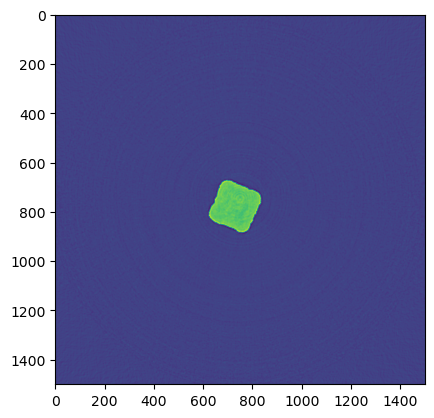

In [51]:
fig, ax = plt.subplots()
ax.imshow(rec_img[110])

In [ ]:
o_imars3dui.reconstruction_and_display()

# Export


In [ ]:
o_imars3dui.export()